# 10 Fold Cross Validation

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score, classification_report,auc
import tensorflow.keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from tensorflow.keras.layers import Dense, Bidirectional,Dense, LSTM, Activation, Dropout, Flatten, LeakyReLU
from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM

from tensorflow.keras.models import Model
from tensorflow.keras.applications import mobilenet_v2, mobilenet, resnet50, densenet
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, \
    BatchNormalization, Activation, GlobalAveragePooling2D, DepthwiseConv2D, \
    Dropout, ReLU, Concatenate, Input, add, Conv1D, MaxPooling1D

from tensorflow.keras.layers import LSTM, GRU, SimpleRNN


from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import math
from tensorflow.keras.callbacks import CSVLogger
from datetime import datetime

import os.path
from scipy.spatial import distance
import scipy.io as sio
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import os
from sklearn.model_selection import KFold
import numpy as np
import random
from Bio import SeqIO
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, Lambda
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras import backend as K
from tensorflow.keras.backend import expand_dims
import tensorflow as tf
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, Lambda
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras import backend as K
from tensorflow.keras.backend import expand_dims
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score, classification_report,auc
import tensorflow.keras
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from tensorflow.keras.layers import Dense, Bidirectional,Dense, LSTM, Activation, Dropout, Flatten, LeakyReLU
from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM

from tensorflow.keras.models import Model
from tensorflow.keras.applications import mobilenet_v2, mobilenet, resnet50, densenet
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, \
    BatchNormalization, Activation, GlobalAveragePooling2D, DepthwiseConv2D, \
    Dropout, ReLU, Concatenate, Input, add, Conv1D, MaxPooling1D

from tensorflow.keras.layers import LSTM, GRU, SimpleRNN


from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import math
from tensorflow.keras.callbacks import CSVLogger
from datetime import datetime
%matplotlib inline
import os.path
from scipy.spatial import distance
import scipy.io as sio

import os 
random_value = random.randint(1,1000)
print(random_value)
random.seed(random_value)


Header_name = ["label","PID","Position","Sequence","Middle_Amino_Acid_ASN(N)"]

col_of_feature = [i for i in range(1,1025)]

Header_name = Header_name + col_of_feature

df = pd.read_csv("Glycobiology_NGlyDE_Training_Positive_1821_Negative_901.csv",header=None)

df.columns = Header_name

2025-03-19 01:25:14.339184: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


610


In [2]:
df

,label,PID,Position,Sequence,Middle_Amino_Acid_ASN(N),1,2,3,4,5,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,1,A6NH11,276,LVRAAGTLEDVYNRTQSLLAERGLL,N,-0.299127,-0.199549,-0.179856,-0.157317,0.337936,...,-0.327789,-0.314218,0.321511,-0.250782,0.169454,0.001813,-0.181462,0.050026,0.545563,0.303575
1,1,A6NMZ7,198,LRTVRDLSMFSQNMTHIIKDVIKYK,N,-0.091352,-0.038519,-0.057120,0.159410,0.160944,...,-0.432134,-0.259395,0.138881,-0.152130,0.063748,-0.387179,-0.014736,0.214407,0.495020,0.105730
2,1,A6NMZ7,275,ENCMRVGLVAYSNETKVINSLSMGI,N,-0.307903,-0.092990,-0.176675,0.009118,0.118984,...,0.168333,-0.305920,0.260424,-0.181876,0.117701,-0.352875,-0.121876,0.405135,0.401849,0.373381
3,1,A6NMZ7,288,ETKVINSLSMGINKSEVLQHIQNLS,N,-0.515774,-0.117307,-0.022314,0.068052,0.066636,...,-0.210106,-0.110623,-0.105524,-0.216135,0.154849,-0.063129,-0.085552,0.069067,0.501313,0.280559
4,1,A6NMZ7,298,GINKSEVLQHIQNLSPRTGKAYTGA,N,-0.085012,-0.047289,-0.057903,0.007610,-0.087651,...,0.022734,-0.138056,-0.243995,-0.013408,0.174836,0.263506,0.024929,0.011373,0.148401,-0.072135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,0,Q9UBG0,102,TMQCLGTGWPGTNTTASLGMYECDR,N,-0.202173,-0.066933,-0.137959,0.014744,-0.007213,...,-0.316318,-0.186689,0.317165,-0.192757,0.260818,-0.433473,-0.015665,0.115081,0.359386,0.477398
2718,0,Q9UBG0,492,DCVTIWGPEGRWNDSPCNQSLPSIC,N,0.114712,0.265292,-0.172495,0.228116,0.045399,...,-0.203411,-0.494579,-0.181199,0.075058,0.100884,-0.175777,-0.015447,0.170279,0.111317,0.134552
2719,0,Q9UBG0,497,WGPEGRWNDSPCNQSLPSICKKAGQ,N,-0.098298,0.070397,-0.094826,0.081707,0.209689,...,-0.448132,-0.075102,0.066447,-0.200532,0.038641,-0.249197,-0.257202,0.165700,0.269885,0.301271
2720,0,Q9UBG0,634,ATGSAMGLWEVKNCTSFRARYICRQ,N,-0.160428,0.112416,-0.302477,-0.247829,-0.089747,...,-0.388438,-0.177720,-0.154067,-0.042331,0.113914,-0.072617,-0.059681,0.408955,0.329044,0.212268


In [3]:
df["label"].value_counts()

1    1821
0     901
Name: label, dtype: int64

In [4]:
df 

df["label"].value_counts()

y_train = np.array(df["label"])

df = df.iloc[:,5:]
train = np.array(df)

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [5]:
train

array([[-0.29912701, -0.1995486 , -0.17985581, ...,  0.05002616,
         0.54556292,  0.30357531],
       [-0.09135242, -0.03851908, -0.0571196 , ...,  0.21440715,
         0.49502024,  0.10573006],
       [-0.30790338, -0.09298988, -0.17667472, ...,  0.40513539,
         0.40184912,  0.37338147],
       ...,
       [-0.09829833,  0.07039663, -0.09482615, ...,  0.16570042,
         0.26988527,  0.30127075],
       [-0.16042761,  0.11241627, -0.30247721, ...,  0.40895495,
         0.32904446,  0.21226849],
       [-0.18608511, -0.24441549,  0.12703583, ...,  0.15542366,
         0.11903537,  0.06460416]])

In [6]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [7]:
train.shape

(2722, 1024)

In [8]:
y_train.shape

(2722,)

In [9]:
165000/3

55000.0

In [10]:
X_train, y_train =  shuffle(train, y_train)


rus = RandomUnderSampler(random_state=84)
X_train, y_train = rus.fit_resample(X_train, y_train)
print(X_train.shape,y_train.shape)

(1802, 1024) (1802,)


[ 301  302  303 ... 1799 1800 1801] [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189 

2025-03-19 01:25:28.916454: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2027] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 8.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
2025-03-19 01:25:28.925290: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2027] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 8.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
2025-03-19 01:25:33.241292: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22278 MB memory:  -> device: 0, name: NVIDIA A30, pci bus id: 0000:17:00.0, compute capability: 8.0
2025-03-19 01:25:35.380741: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


5/5 [==============================] - 6s 77ms/step - loss: 0.6721 - accuracy: 0.7185 - val_loss: 0.6231 - val_accuracy: 0.8099 - lr: 0.0010
Epoch 2/400
5/5 [==============================] - 0s 48ms/step - loss: 0.6183 - accuracy: 0.7778 - val_loss: 0.5535 - val_accuracy: 0.8264 - lr: 0.0010
Epoch 3/400
5/5 [==============================] - 0s 27ms/step - loss: 0.5708 - accuracy: 0.7806 - val_loss: 0.4951 - val_accuracy: 0.8347 - lr: 0.0010
Epoch 4/400
5/5 [==============================] - 0s 7ms/step - loss: 0.5266 - accuracy: 0.7796 - val_loss: 0.4517 - val_accuracy: 0.8347 - lr: 0.0010
Epoch 5/400
5/5 [==============================] - 0s 7ms/step - loss: 0.4942 - accuracy: 0.7796 - val_loss: 0.4256 - val_accuracy: 0.8347 - lr: 0.0010
Epoch 6/400
5/5 [==============================] - 0s 7ms/step - loss: 0.4775 - accuracy: 0.7843 - val_loss: 0.3990 - val_accuracy: 0.8347 - lr: 0.0010
Epoch 7/400
5/5 [==============================] - 0s 38ms/step - loss: 0.4595 - accuracy: 0.7824





[   0    1    2 ... 1499 1500 1501] [ 601  602  603  604  605  606  607  608  609  610  611  612  613  614
  615  616  617  618  619  620  621  622  623  624  625  626  627  628
  629  630  631  632  633  634  635  636  637  638  639  640  641  642
  643  644  645  646  647  648  649  650  651  652  653  654  655  656
  657  658  659  660  661  662  663  664  665  666  667  668  669  670
  671  672  673  674  675  676  677  678  679  680  681  682  683  684
  685  686  687  688  689  690  691  692  693  694  695  696  697  698
  699  700  701  702  703  704  705  706  707  708  709  710  711  712
  713  714  715  716  717  718  719  720  721  722  723  724  725  726
  727  728  729  730  731  732  733  734  735  736  737  738  739  740
  741  742  743  744  745  746  747  748  749  750  751  752  753  754
  755  756  757  758  759  760  761  762  763  764  765  766  767  768
  769  770  771  772  773  774  775  776  777  778  779  780  781  782
  783  784  785  786  787  788  789  

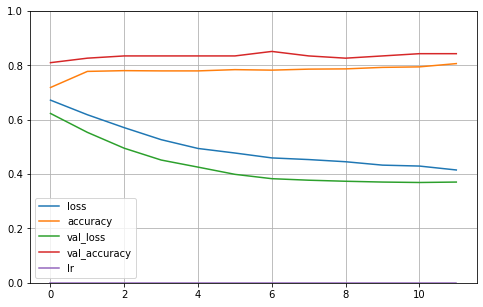

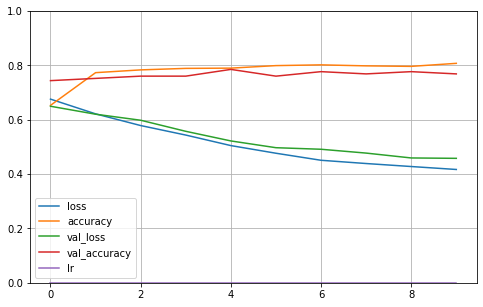

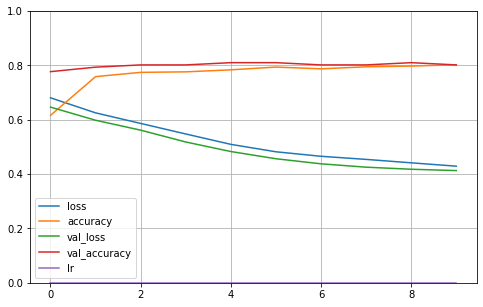

In [11]:
MCC = []
kfold = StratifiedKFold(n_splits=3)
cvscores, auc_scores, sn, sp, acc = list(), list(), list(), list(), list()

for train_index, test_index in kfold.split(X_train, y_train):
    
    print(train_index, test_index)
    print(len(train_index), len(test_index))

    
    xtrain, xval = X_train[train_index], X_train[test_index]
    ytrain, yval = y_train[train_index], y_train[test_index]      
    print("Humphry Humphry")
    print("Humphry Humphry")
    print(xtrain.shape)
    print(xtrain)
    print()
    print(xval.shape)
    print(xval)
    print("Humphry Humphry")
    print("Humphry Humphry")
    x_train, x_val, y_train_1, y_val = train_test_split(xtrain,ytrain,random_state =7, test_size=0.1)
    
    y_train_1 = tf.keras.utils.to_categorical(y_train_1,2)
    y_val = tf.keras.utils.to_categorical(y_val,2)
    
    
    model = Sequential()
    model.add(Dense(64, input_dim=1024, kernel_initializer='uniform', activation="relu"))
    model.add(Dropout(0.3))
#     model.add(Dense(512, kernel_initializer='uniform', activation="relu"))
#     model.add(Dropout(0.3))
#     model.add(Dense(256, kernel_initializer='uniform', activation="relu"))
#     model.add(Dropout(0.3))
#     model.add(Dense(32, kernel_initializer='uniform', activation="relu"))
#     model.add(Dropout(0.3))
    model.add(Dense(2, kernel_initializer='uniform', activation="softmax"))


    model.compile(optimizer=tf.keras.optimizers.Adam(),loss="binary_crossentropy",metrics=["accuracy"])

    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath="ROC_ROC_Premise_Assumption.h5", 
                                    monitor = 'val_accuracy',
                                    verbose=0, 
                                    save_weights_only=False,
                                    save_best_only=True)

    reduce_lr_acc = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.001, patience=7, verbose=1, min_delta=1e-4, mode='max')

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,mode='max')

    history = model.fit(x_train, y_train_1,epochs=400,verbose=1,batch_size=256,
                            callbacks=[checkpointer,reduce_lr_acc, early_stopping],validation_data=(x_val, y_val))

    Y_pred = model.predict(xval)
    Y_pred = (Y_pred > 0.5)
    y_pred = [np.argmax(y, axis=None, out=None) for y in Y_pred]
    y_pred = np.array(y_pred)
    
    confusion = confusion_matrix(yval,y_pred)

    print(confusion)

    mcc = matthews_corrcoef(yval,y_pred)
    print("MCC : ", mcc)
    ACCuRRacYY = accuracy_score(yval,y_pred)
    acc.append(ACCuRRacYY)
    
    TP = confusion[1][1]
    TN = confusion[0][0]
    FP = confusion[0][1]
    FN = confusion[1][0]

    Sensitivity = TP/(TP+FN)

    Specificity = TN/(TN+FP)
    print('Sensitivity : ', Sensitivity)

    print('Specificity : ', Specificity)

    print("Precision Score: ",precision_score(yval,y_pred))

    print("Recall Score: ",recall_score(yval,y_pred))
    
    
    cvscores.append(mcc)

    
    sn.append(Sensitivity)
    sp.append(Specificity)

    print("Sensitivity:   ",Sensitivity,"\t","Specificity:   ",Specificity)


    fpr, tpr, _ = roc_curve(yval, y_pred)

    roc_auc_test = auc(fpr,tpr)



    print("Area Under Curve:   ",roc_auc_test)
    auc_scores.append(roc_auc_test)
    
    import pandas as pd
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) 
    
    plt.savefig("10 Fold NLP Class Demo"+str(random_value)+".png")
    
    print("\n\n\n")


print("Mean MCC = %.4f ± %.4f and Mean AUC = %.4f ± %.4f" % (np.mean(cvscores),np.std(cvscores),np.mean(auc_scores),np.std(auc_scores)))
print("Mean Sensitivity = %.4f ± %.4f and Mean Specificity = %.4f ± %.4f and Mean Accuracy = %.4f ± %.4f" % (np.mean(sn),np.std(sn),np.mean(sp),np.std(sp),np.mean(acc),np.std(acc)))

print("\n\n\n\n\n\n\n\n\n\n\n\n\n")

# Hold One Out CV

200
(1802, 1024)
Epoch 1/400
6/6 [==============================] - 1s 44ms/step - loss: 0.6755 - accuracy: 0.7051 - val_loss: 0.6359 - val_accuracy: 0.8098 - lr: 0.0010
Epoch 2/400
6/6 [==============================] - 0s 6ms/step - loss: 0.6130 - accuracy: 0.7771 - val_loss: 0.5572 - val_accuracy: 0.8098 - lr: 0.0010
Epoch 3/400
6/6 [==============================] - 0s 28ms/step - loss: 0.5611 - accuracy: 0.7785 - val_loss: 0.4916 - val_accuracy: 0.8221 - lr: 0.0010
Epoch 4/400
6/6 [==============================] - 0s 24ms/step - loss: 0.5144 - accuracy: 0.7812 - val_loss: 0.4509 - val_accuracy: 0.8282 - lr: 0.0010
Epoch 5/400
6/6 [==============================] - 0s 6ms/step - loss: 0.4856 - accuracy: 0.7764 - val_loss: 0.4229 - val_accuracy: 0.8282 - lr: 0.0010
Epoch 6/400
6/6 [==============================] - 0s 19ms/step - loss: 0.4685 - accuracy: 0.7874 - val_loss: 0.4045 - val_accuracy: 0.8344 - lr: 0.0010
Epoch 7/400
6/6 [==============================] - 0s 6ms/step - lo

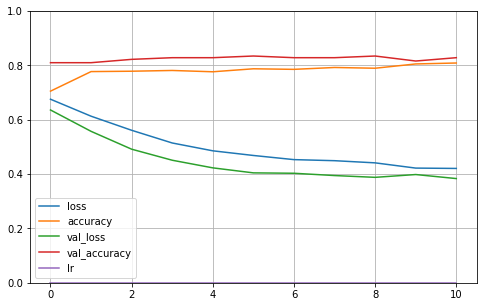

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score, classification_report,auc
import tensorflow.keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from tensorflow.keras.layers import Dense, Bidirectional,Dense, LSTM, Activation, Dropout, Flatten, LeakyReLU
from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM

from tensorflow.keras.models import Model
from tensorflow.keras.applications import mobilenet_v2, mobilenet, resnet50, densenet
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, \
    BatchNormalization, Activation, GlobalAveragePooling2D, DepthwiseConv2D, \
    Dropout, ReLU, Concatenate, Input, add, Conv1D, MaxPooling1D

from tensorflow.keras.layers import LSTM, GRU, SimpleRNN


from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import math
from tensorflow.keras.callbacks import CSVLogger
from datetime import datetime

import os.path
from scipy.spatial import distance
import scipy.io as sio
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import os
from sklearn.model_selection import KFold
import numpy as np
import random
from Bio import SeqIO
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, Lambda
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras import backend as K
from tensorflow.keras.backend import expand_dims
import tensorflow as tf
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, Lambda
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras import backend as K
from tensorflow.keras.backend import expand_dims
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score, classification_report,auc
import tensorflow.keras
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from tensorflow.keras.layers import Dense, Bidirectional,Dense, LSTM, Activation, Dropout, Flatten, LeakyReLU
from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM

from tensorflow.keras.models import Model
from tensorflow.keras.applications import mobilenet_v2, mobilenet, resnet50, densenet
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, \
    BatchNormalization, Activation, GlobalAveragePooling2D, DepthwiseConv2D, \
    Dropout, ReLU, Concatenate, Input, add, Conv1D, MaxPooling1D

from tensorflow.keras.layers import LSTM, GRU, SimpleRNN


from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import math
from tensorflow.keras.callbacks import CSVLogger
from datetime import datetime
%matplotlib inline
import os.path
from scipy.spatial import distance
import scipy.io as sio

import os 
random_value = random.randint(1,1000)
print(random_value)
random.seed(random_value)


Header_name = ["label","PID","Position","Sequence","Middle_Amino_Acid_ASN(N)"]

col_of_feature = [i for i in range(1,1025)]

Header_name = Header_name + col_of_feature

df = pd.read_csv("Glycobiology_NGlyDE_Training_Positive_1821_Negative_901.csv",header=None)

df.columns = Header_name

df["label"].value_counts()

y_train = np.array(df["label"])

df = df.iloc[:,5:]
train = np.array(df)

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, y_train = shuffle(train, y_train)


rus = RandomUnderSampler(random_state=84)
X_train, y_train = rus.fit_resample(X_train, y_train)
print(X_train.shape)


xtrain, xval, ytrain, yval = train_test_split(X_train, y_train,random_state =7, test_size=0.1)

x_train, x_val, y_train_1, y_val = train_test_split(xtrain,ytrain,random_state =7, test_size=0.1)

y_train_1 = tf.keras.utils.to_categorical(y_train_1,2)
y_val = tf.keras.utils.to_categorical(y_val,2)


model = Sequential()
model.add(Dense(64, input_dim=1024, kernel_initializer='uniform', activation="relu"))
model.add(Dropout(0.3))
#     model.add(Dense(512, kernel_initializer='uniform', activation="relu"))
#     model.add(Dropout(0.3))
#     model.add(Dense(256, kernel_initializer='uniform', activation="relu"))
#     model.add(Dropout(0.3))
#     model.add(Dense(32, kernel_initializer='uniform', activation="relu"))
#     model.add(Dropout(0.3))
model.add(Dense(2, kernel_initializer='uniform', activation="softmax"))


model.compile(optimizer=tf.keras.optimizers.Adam(),loss="binary_crossentropy",metrics=["accuracy"])

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath="ROC_ROC_Premise_Assumption.h5", 
                                monitor = 'val_accuracy',
                                verbose=0, 
                                save_weights_only=False,
                                save_best_only=True)

reduce_lr_acc = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.001, patience=7, verbose=1, min_delta=1e-4, mode='max')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,mode='max')

history = model.fit(x_train, y_train_1,epochs=400,verbose=1,batch_size=256,
                        callbacks=[checkpointer,reduce_lr_acc, early_stopping],validation_data=(x_val, y_val))

Y_pred = model.predict(xval)
Y_pred = (Y_pred > 0.5)
y_pred = [np.argmax(y, axis=None, out=None) for y in Y_pred]
y_pred = np.array(y_pred)

confusion = confusion_matrix(yval,y_pred)

print(confusion)

mcc = matthews_corrcoef(yval,y_pred)
print("MCC : ", mcc)
ACCuRRacYY = accuracy_score(yval,y_pred)

TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

print('Sensitivity : ', Sensitivity)

print('Specificity : ', Specificity)

print("Precision Score: ",precision_score(yval,y_pred))

print("Recall Score: ",recall_score(yval,y_pred))

print("Sensitivity:   ",Sensitivity,"\t","Specificity:   ",Specificity)


fpr, tpr, _ = roc_curve(yval, y_pred)

roc_auc_test = auc(fpr,tpr)



print("Area Under Curve:   ",roc_auc_test)

import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 

plt.savefig("10 Fold NLP Class Demo"+str(random_value)+".png")

print("\n\n\n")

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                65600     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 65,730
Trainable params: 65,730
Non-trainable params: 0
_________________________________________________________________


In [14]:
confusion

array([[73, 26],
       [ 5, 77]])

In [15]:
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

Precision = TP/(TP+FP)

Recall = Sensitivity

Accuracy = (TP+TN)/(TP+TN+FP+FN)

F1 = 2*(Precision*Recall)/(Precision+Recall)

In [16]:
print(f"Sensitivity {Sensitivity:.2f} \t Specificity {Specificity:.2f} \t Precision {Precision:.2f} \t F1 {F1:.2f} \t Accuracy {Accuracy:.2f}")

Sensitivity 0.94 	 Specificity 0.74 	 Precision 0.75 	 F1 0.83 	 Accuracy 0.83


# ROC Curve

6/6 [==============================] - 0s 783us/step


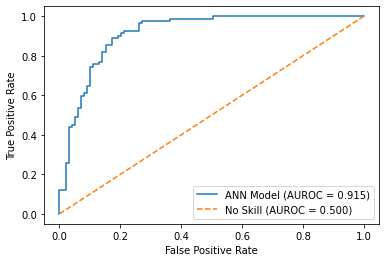

In [17]:
%matplotlib inline

y_pred_1D_CNN_BiLSTM = y_pred
OneD_CNN_BiLSTM_model_Prob_Probabilities = model.predict(xval)
# keep probabilities for the positive outcome only
OneD_CNN_BiLSTM_model_Prob = OneD_CNN_BiLSTM_model_Prob_Probabilities[:,1]

OneD_CNN_BiLSTM_model_Prob_auc = roc_auc_score(yval, OneD_CNN_BiLSTM_model_Prob)

# plot the roc curve for the model
ns_probs = [0 for _ in range(len(OneD_CNN_BiLSTM_model_Prob))]

# calculate scores
ns_auc = roc_auc_score(yval, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(yval, ns_probs)

OneD_CNN_BiLSTM_model_fpr, OneD_CNN_BiLSTM_model_tpr, _ = roc_curve(yval, OneD_CNN_BiLSTM_model_Prob)

plt.plot(OneD_CNN_BiLSTM_model_fpr, OneD_CNN_BiLSTM_model_tpr,  label='ANN Model (AUROC = %0.3f)' % OneD_CNN_BiLSTM_model_Prob_auc)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUROC = %0.3f)' % ns_auc)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('ROC_Curve'+str(50)+'.png', dpi=350, bbox_inches='tight')
plt.show()

In [18]:
OneD_CNN_BiLSTM_model_Prob_Probabilities

array([[1.63144097e-01, 8.36855948e-01],
       [4.16101702e-02, 9.58389819e-01],
       [2.59955321e-02, 9.74004507e-01],
       [4.54101354e-01, 5.45898676e-01],
       [4.85654920e-02, 9.51434553e-01],
       [9.95512068e-01, 4.48787771e-03],
       [2.44892731e-01, 7.55107224e-01],
       [9.96519566e-01, 3.48046259e-03],
       [9.29626226e-01, 7.03737065e-02],
       [3.96619067e-02, 9.60338116e-01],
       [9.96694207e-01, 3.30582680e-03],
       [9.97848988e-01, 2.15099938e-03],
       [4.80835326e-02, 9.51916516e-01],
       [6.25627697e-01, 3.74372333e-01],
       [9.99813259e-01, 1.86765654e-04],
       [7.51863495e-02, 9.24813628e-01],
       [9.99600351e-01, 3.99619748e-04],
       [5.97892642e-01, 4.02107358e-01],
       [9.95324314e-01, 4.67572967e-03],
       [2.12007225e-01, 7.87992775e-01],
       [8.02378803e-02, 9.19762135e-01],
       [9.97609496e-01, 2.39050272e-03],
       [8.03695560e-01, 1.96304411e-01],
       [6.28179073e-01, 3.71820956e-01],
       [9.999104

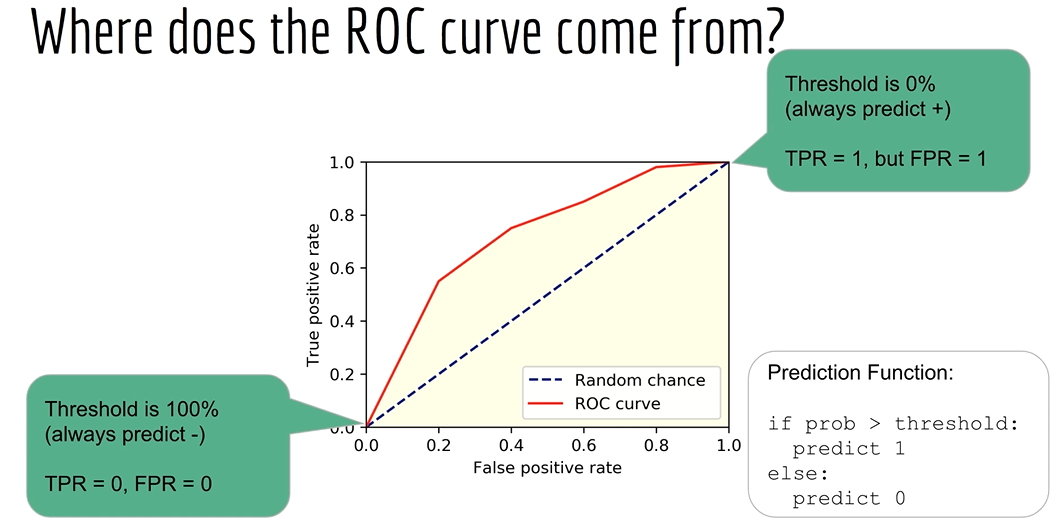

In [19]:
from IPython.display import Image
Image(filename='ROC_Elaboration.PNG') 

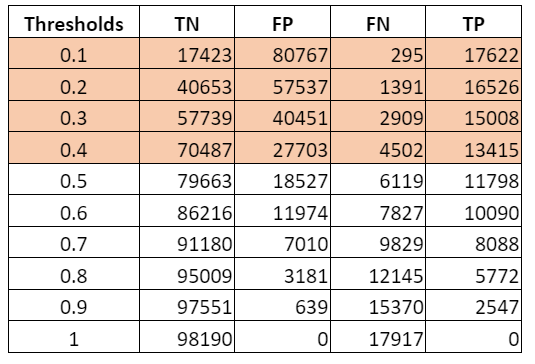

In [20]:
from IPython.display import Image
Image(filename='ROC_Curve_Further_Elaboration.PNG') 

# Thank You